# Poisson Distribution

The Poisson Distribution is often represented as:

$$ X \sim \text{Poi}(\lambda) $$

We use Poisson Distribution when we want to find out how unusual an event frequency is for a given interval.

We often use it when we're counting the occurrences of events in a given unit of time, distance, area, or volume. For example:
- The number of car accidents in a day
- The number of trees in an acre of land

The number of events (in these cases) is a random variable that may or may not have the Poisson Distribution. 

A Poisson random variable $X$ is a count of the number of occurrences of an event in a fixed unit of measure (usually time). 

For a random variable to be Poisson distributed, the events must happen ***randomly and independently***:
- Events are occuring independently
- The probability that an event occurs in a given unit of measure does not change

Refereneces:
* [Poisson Process - Khan Academy](https://www.khanacademy.org/math/statistics-probability/random-variables-stats-library/poisson-distribution/v/poisson-process-1?modal=1)
* [The Poisson Distribution](http://www.stats.ox.ac.uk/~filippi/Teaching/psychology_humanscience_2015/lecture5.pdf)
* [An Introduction to the Poisson Distribution](https://www.youtube.com/watch?v=jmqZG6roVqU&ab_channel=jbstatistics)

# Expected Value

The expected value is:

$$ E(X) = \mu = \lambda$$

The expected value is equal to the mean. The mean is often written as $\mu$, but for the Poisson distribution $\lambda$ is more often used.

# Variance

The variance is:

$$\sigma^2 = \lambda$$

So, for the Poisson distribution, the mean and the variance are equal. 

# Probability Mass Function

The PMF equation is:

$$f(k; \lambda) = \text{P}(X=k) = \frac{\lambda^k e^{-\lambda}}{k!} $$ 

Where:
- $k$ is the count of the number of events in a given unit of time (can be any non-negative, whole number value)
- $e$ is Eulers constant (2.71828)
- $\lambda$ - The expected value

This equation tells us what the probability is when $k$ takes on a specific value.

### Calculate By Hand

In [164]:
def poisson_pmf( poisson_lambda, poisson_k ):
    return ( (poisson_lambda ** poisson_k) * math.exp( -poisson_lambda ) / math.factorial( poisson_k ) )

poisson_lambda = 7
poisson_k = 8
print( "p = %6.4f" % poisson_pmf( poisson_lambda, poisson_k ) )

p = 0.1304


### Calculate using Scipy

In [113]:
from scipy.stats import poisson
mu = 7
k = 8
prob = poisson.pmf(k, mu)
print(prob)

0.1303774322150455


# Cumulative Distribution Function

While the PMF gives us the probability at a specific mass, if we want the probability of getting "up to" a certain value of $k$, then we can use the CDF function:

$$F(k; \lambda) = \sum_{i=0}^{k} \frac{\lambda^i e^{-\lambda}}{i!} = {P}(X=0) + {P}(X=1) + ... + {P}(X=k) $$ 

References:
- [Poisson Distribution - CDF](https://www.itl.nist.gov/div898/handbook/eda/section3/eda366j.htm)

### Calculate By Hand

In [121]:
def poisson_cdf( poisson_lambda, poisson_k ):
    cdf = 0
    for i in range( 0, poisson_k + 1 ):
        cdf = cdf + poisson_pmf( poisson_lambda, i)
    return cdf

poisson_lambda = 7
poisson_k = 8
print( "p = %6.4f" % poisson_cdf( poisson_lambda, poisson_k ) )

p = 0.7291


### Calculate using Scipy

In [122]:
from scipy.stats import poisson
mu = 7
k = 8
prob = poisson.cdf(k, mu)
print(prob)

0.7290912677380824


# Relation to Binomial

The Poisson Distribution is actually just a binomial distribution ([proof](https://www.khanacademy.org/math/statistics-probability/random-variables-stats-library/poisson-distribution/v/poisson-process-1?modal=1)) when you take the $\lim_{n \to \infty}$ and $\lim_{p \to 0}$ (and $np$ is constant).

The Poisson distribution with $\lambda = np$ closely approximates the binomial distribution if $n$ is large and $p$ is small. 


# Graphs

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def create_poisson_dataframe( poisson_lambda, range_max ):
    df = pd.DataFrame(columns=['k', 'P'])

    for poisson_k in range( range_max ):
      poisson = ( (poisson_lambda ** poisson_k) * math.exp( -poisson_lambda ) / math.factorial( poisson_k ) )
      df.loc[-1] = [poisson_k, poisson]  # adding a row
      df.index = df.index + 1  # shifting index
      df = df.sort_index()  # sorting by index

    df = df.astype({'k': 'int32'})
    return df

### Lambda < 1

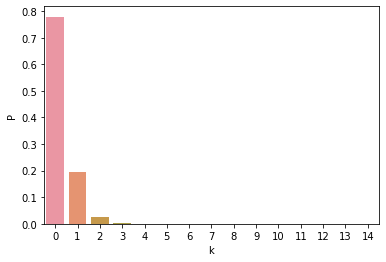

In [93]:
poisson_lambda = .25
df = create_poisson_dataframe( poisson_lambda, 15 )  
vis = sns.barplot(data = df, x='k', y='P')

### Lambda = 1

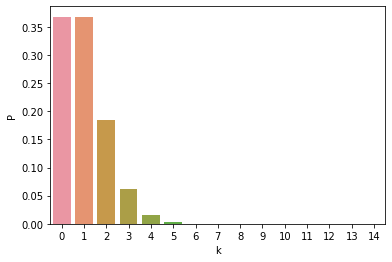

In [94]:
poisson_lambda = 2.3 * 2
df = create_poisson_dataframe( poisson_lambda, 15 )  
vis = sns.barplot(data = df, x='k', y='P')

### Lambda = 1.5

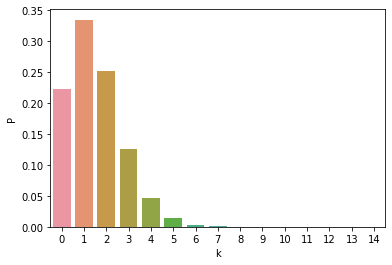

In [96]:
poisson_lambda = 1.5
df = create_poisson_dataframe( poisson_lambda, 15 )  
vis = sns.barplot(data = df, x='k', y='P')

### Lambda = 3

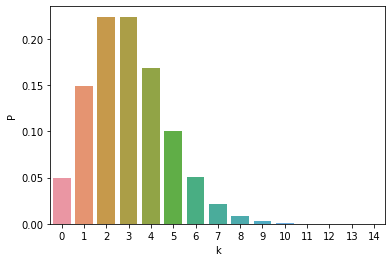

In [97]:
poisson_lambda = 3
df = create_poisson_dataframe( poisson_lambda, 15 )  
vis = sns.barplot(data = df, x='k', y='P')

### Lambda = 5

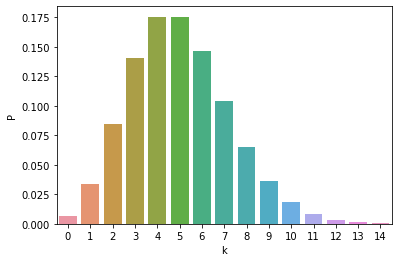

In [99]:
poisson_lambda = 5
df = create_poisson_dataframe( poisson_lambda, 15 )  
vis = sns.barplot(data = df, x='k', y='P')

### Lambda = 10

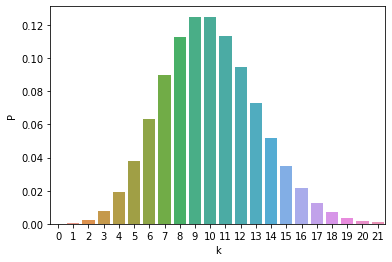

In [101]:
poisson_lambda = 10
df = create_poisson_dataframe( poisson_lambda, 22 )  
vis = sns.barplot(data = df, x='k', y='P')

# Example Problems

### Lebron James

**Question** 

Lebron James averages 35 points per game. What is the liklihood of Lebron scoring 12 points in the first quarter of his next game? 

**Answer**

We can use the Poisson Distribution to determine the chance given the specified time interval.

The expected value is:

$$ E(X) = \lambda = 35 \frac{\text{pts}}{\text{game}} = 8.75 \frac{\text{pts}}{\text{quarter}}$$

The PMF equation is:

$$f(k; \lambda) = \text{P}(X=k) = \frac{\lambda^k e^{-\lambda}}{k!} $$ 

So, in this case:
$$k = 12 \frac{\text{pts}}{\text{quarter}}$$

So:

$$\text{Pr}(X=12) = \frac{(8.75)^{12} \cdot e^{-8.75}}{12!} = 0.0666 $$ 


In [125]:
import math

poisson_lambda = 35 / 4
poisson_k = 12
poisson = poisson_pmf(poisson_lambda, poisson_k)
print( "p = %6.4f" % poisson )

p = 0.0666


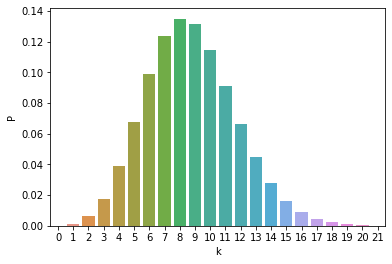

In [84]:
poisson_lambda = 35 / 4
df = create_poisson_dataframe( poisson_lambda, 22 )  
vis = sns.barplot(data = df, x='k', y='P')

### Plutonium Decay

**Question**

One nanogram of Plutonium-239 will have an average of 2.3 radioactive decays per second, and the number of decays will follow a Poisson distribution.

What is the probability that in a 2 second period there are exactly 3 radioactive decays?

**Answer**

In [126]:
import math

poisson_lambda = 2.3 * 2
poisson_k = 3
poisson = poisson_pmf(poisson_lambda, poisson_k)
print( "p = %6.4f" % poisson )

p = 0.1631


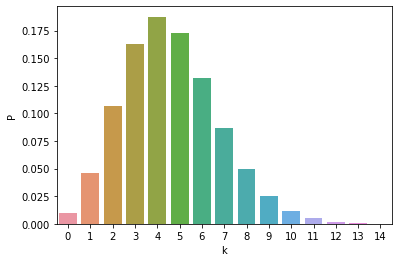

In [85]:
poisson_lambda = 2.3 * 2
df = create_poisson_dataframe( poisson_lambda, 15 )  
vis = sns.barplot(data = df, x='k', y='P')

### Probability Instead of Lambda

**Question**

If the probability of seeing at least one car on the highway in 30 minutes is 0.95, what is the probability of seeing at least one car on the highway in 10 minutes? (Assume a constant default probability)

**Answer**

Assuming a Poisson Distribution, we know that the probability mass function is:

$$\text{P}(X=k) = \frac{\lambda^k e^{-\lambda}}{k!} $$

So, the probability that no cars pass in thirty minutes is $1 - 0.95 = 0.05$:
$$\text{P}(X=0) = 0.05 = \frac{\lambda^0 e^{-\lambda}}{0!} = e^{-\lambda} $$ 

Then, we can solve for lamda by taking the log of both sides:
$$-\text{ln}(0.05) = \lambda $$ 

$$\lambda = 2.995 \approx 3 $$ 

There are three cars every thirty minutes, which is $0.1$ every minute. So, we multiply that by 10 minutes and get $\lambda=1$ for units of 10 minutes.

Then we calculate the probability for exactly 0 cars in 10 minutes:
$$\text{P}(X=0) = \frac{\lambda^0 e^{-1}}{0!} = 0.368 $$

Then, to find the probability of ***at least one*** car, we just subtract that from one:

$$\text{P}(X>0) = 1 - 0.368 = 0.632$$

- [Quora Answer](https://www.quora.com/If-the-probability-of-observing-a-car-in-30-minutes-on-a-highway-is-0-95-what-is-the-probability-of-observing-a-car-in-10-minutes-assuming-constant-default-probability)
- [Math Stack Exchange Answer](https://math.stackexchange.com/a/3904247/10438)

In [163]:
poisson_lambda = 1
poisson_k = 0
poisson = poisson_pmf(poisson_lambda, poisson_k)
print( 1 - poisson )

0.6321205588285577


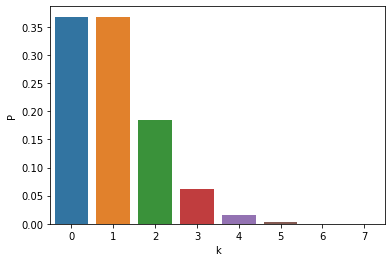

In [165]:
poisson_lambda = 1
df = create_poisson_dataframe( poisson_lambda, 8 )  
vis = sns.barplot(data = df, x='k', y='P')